# Proyecto a mitad del bootcamp - Regresion



Objetivo : 
- La tarea consiste en construir un modelo que prediga el precio de una casa en función de las características proporcionadas en el conjunto de datos. 
- La alta dirección también quiere explorar las características de las viviendas utilizando alguna herramienta de inteligencia empresarial. 
- Uno de esos parámetros incluye comprender qué factores son responsables del mayor valor de la propiedad: $650 mil y más. Las preguntas se proporcionan más adelante en el    documento para las cuales puede utilizar Tableau.

Estructura del proyecto

1. Importar bibliotecas y cargar el conjunto de datos
2. Visión general del conjunto de datos
3. Limpieza de datos
4. Análisis exploratorio de datos (EDA)
5. Modelización de datos y examenar el cruzado de modelos
6. Conclusión

## 1. Importar bibliotecas y cargar el conjunto de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [3]:
df = pd.read_excel(r'C:\Users\marco\OneDrive\Desktop\ironhack\Proyectos\proyectos_ mitad\data_mid_bootcamp_project_regression\files\regression_data.xls')

## 2. Visión general de los datos

In [3]:
# Ahora voy ha identificar los datos del DataFrame usando varios codigos.
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
df.shape

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [6]:
# Indentificamos los tipos de datos de las columnas.
df.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [7]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [8]:
# voy a traducir las columnas de ingles a español
traducciones = {
    'id': 'id',
    'date': 'fecha',
    'bedrooms': 'dormitorios',
    'bathrooms': 'baños',
    'sqft_living': 'pies_cuadrados_vivienda',
    'sqft_lot': 'pies_cuadrados_parcela',
    'floors': 'pisos',
    'waterfront': 'frente_al_mar',
    'view': 'vista',
    'condition': 'estado',
    'grade': 'calificación',
    'sqft_above': 'pies_cuadrados_sin_sotano',
    'sqft_basement': 'pies_cuadrados_sótano',
    'yr_built': 'año_construcción',
    'yr_renovated': 'año_renovación',
    'zipcode': 'código_postal',
    'lat': 'latitud',
    'long': 'longitud',
    'sqft_living15': 'pies_cuadrados_salon_15',
    'sqft_lot15': 'pies_cuadrados_parcela_15',
    'price': 'precio'
    }
# Renombrar las columnas
df = df.rename(columns=traducciones)

# Verificar los cambios
df.head()

,id,fecha,dormitorios,baños,pies_cuadrados_vivienda,pies_cuadrados_parcela,pisos,frente_al_mar,vista,estado,...,pies_cuadrados_sin_sotano,pies_cuadrados_sótano,año_construcción,año_renovación,código_postal,latitud,longitud,pies_cuadrados_salon_15,pies_cuadrados_parcela_15,precio
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [9]:
df.shape

(21597, 21)

In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,21597.0,4580474287.770987,1000102.0,2123049175.0,3904930410.0,7308900490.0,9900000190.0,2876735715.74778
fecha,21597,2014-10-29 04:20:38.171968512,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
dormitorios,21597.0,3.3732,1.0,3.0,3.0,4.0,33.0,0.926299
baños,21597.0,2.115826,0.5,1.75,2.25,2.5,8.0,0.768984
pies_cuadrados_vivienda,21597.0,2080.32185,370.0,1430.0,1910.0,2550.0,13540.0,918.106125
pies_cuadrados_parcela,21597.0,15099.40876,520.0,5040.0,7618.0,10685.0,1651359.0,41412.636876
pisos,21597.0,1.494096,1.0,1.0,1.5,2.0,3.5,0.539683
frente_al_mar,21597.0,0.007547,0.0,0.0,0.0,0.0,1.0,0.086549
vista,21597.0,0.234292,0.0,0.0,0.0,0.0,4.0,0.76639
estado,21597.0,3.409825,1.0,3.0,3.0,4.0,5.0,0.650546


Resumen del conjunto de datos:

- Hay 21,597 casas en venta registradas en este DataFreme.
- El conjunto de datos incluye varias características, que he renombrado a español para facilitar el análisis.
- Voy a escrbir algunas observaciones sobre las columnas más importantes:


    - precio: El precio medio de la vivienda es de $540,000. La desviación estándar es de $370,000, y el precio de la vivienda más cara es de $7.700.000, mientas de la vivienda más barata es de $75,000.
    
    - Dormitorios: La casa media tiene alrededor de 3,37 dormitorios, pero el número puede variar mucho, con una desviación estándar de alrededor de 0,93. El número mínimo de dormitorios es 1 y el máximo 33.

    - Baños: Las casas tienen de media 2,12 baños, con una desviación típica de 0,77. El número mínimo de cuartos de baño es 0,5, mientras que el máximo es 8.

    - Pies²_vivienda: La superficie habitable media es de unos 2.080 pies cuadrados, con una desviación estándar de 918. La casa más pequeña tiene 370 pies cuadrados, mientras que la más grande tiene 13.540 pies cuadrados.

    - Pies² Parcela: El tamaño medio de la parcela es de 15.099 pies cuadrados, pero el tamaño varía mucho (la desviación estándar es de 41.412) y la parcela más grande es de 1.651.359 pies cuadrados.

    - Plantas: El número medio de plantas de una casa es aproximadamente 1,49, y las casas del conjunto de datos tienen entre 1 y 3,5 plantas.

    - Frente al mar: La media de esta característica es cercana a 0, lo que sugiere que la mayoría de las casas no están frente al mar.


## 3. Limpieza de datos

In [11]:
df.columns

Index(['id', 'fecha', 'dormitorios', 'baños', 'pies_cuadrados_vivienda',
       'pies_cuadrados_parcela', 'pisos', 'frente_al_mar', 'vista', 'estado',
       'calificación', 'pies_cuadrados_sin_sotano', 'pies_cuadrados_sótano',
       'año_construcción', 'año_renovación', 'código_postal', 'latitud',
       'longitud', 'pies_cuadrados_salon_15', 'pies_cuadrados_parcela_15',
       'precio'],
      dtype='object')

In [12]:
# Ahora voy ha realizar la limpieza de datos, primero mirare si hay NaNs.

df.isnull().sum() # Puedo observar que no hay NaNs

# He visto que no hay NaNs.

id                           0
fecha                        0
dormitorios                  0
baños                        0
pies_cuadrados_vivienda      0
pies_cuadrados_parcela       0
pisos                        0
frente_al_mar                0
vista                        0
estado                       0
calificación                 0
pies_cuadrados_sin_sotano    0
pies_cuadrados_sótano        0
año_construcción             0
año_renovación               0
código_postal                0
latitud                      0
longitud                     0
pies_cuadrados_salon_15      0
pies_cuadrados_parcela_15    0
precio                       0
dtype: int64

In [13]:
df.to_csv('01_regresiones_date.csv', index= False)

In [14]:
# cambiar el tipo del  código_postal (string), para tratarlo como categórico

df['código_postal'] = df['código_postal'].apply(str)
df.dtypes

id                                    int64
fecha                        datetime64[ns]
dormitorios                           int64
baños                               float64
pies_cuadrados_vivienda               int64
pies_cuadrados_parcela                int64
pisos                               float64
frente_al_mar                         int64
vista                                 int64
estado                                int64
calificación                          int64
pies_cuadrados_sin_sotano             int64
pies_cuadrados_sótano                 int64
año_construcción                      int64
año_renovación                        int64
código_postal                        object
latitud                             float64
longitud                            float64
pies_cuadrados_salon_15               int64
pies_cuadrados_parcela_15             int64
precio                                int64
dtype: object

In [15]:
# Eliminar datos de las siguientes columnas.
df = df.drop(['fecha', 'id', 'latitud', 'longitud'], axis=1) 

# Voy ha dividir las columnar entre df_categorica y df_numericas.

df_numericas = df.select_dtypes(include=['int', 'float']) # como las columnas estan normalizadas, tengo que eliminar las columnas categoricas. 
                                                         
# Voy a eliminar la columna de  estado, frente_al_mar, vista, código_postal, calificación.

columnas_para_eliminar = ['estado', 'frente_al_mar', 'vista', 'calificación']


df_numericas = df_numericas.drop(columnas_para_eliminar, axis=1)
df_categorica =df[['estado', 'frente_al_mar', 'vista','calificación']]



In [16]:
df_concatenado = pd.concat([df_numericas, df_categorica], axis=1)

En la limpieza de datos mirado que no hay NaNs, he cambiado el tipo del  código postal (string), para tratarlo como categóric y tambien he dividio las columnas entre df_categorica y df_numericas.

## 4. EDE .(Análisis Exploratorio de Datos)

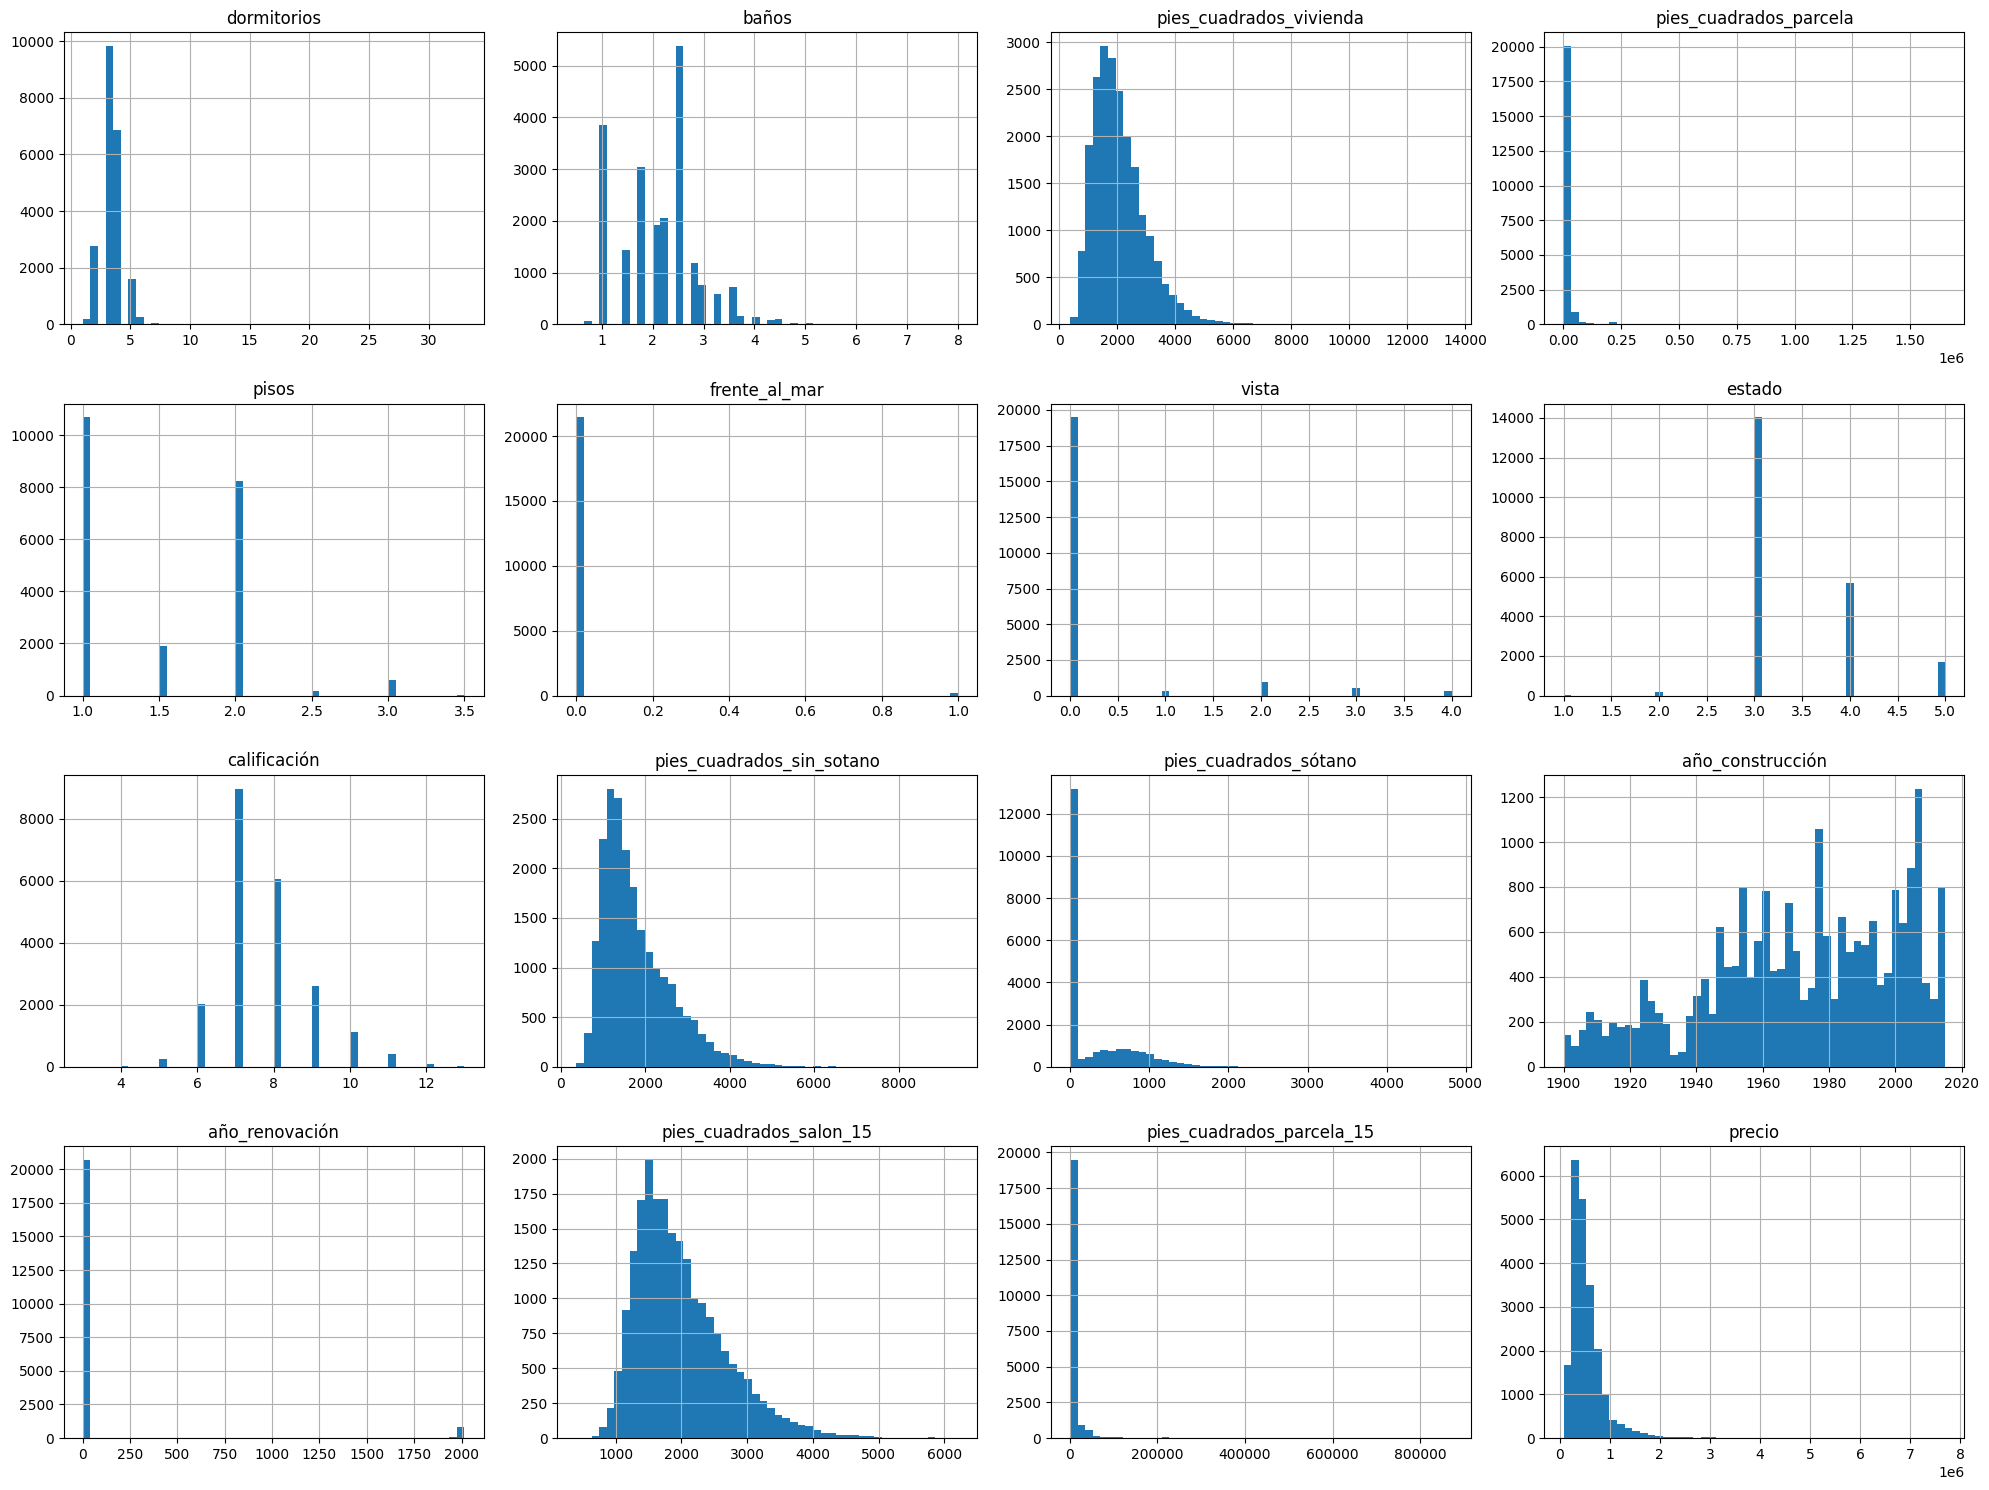

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

<Axes: xlabel='precio', ylabel='Count'>

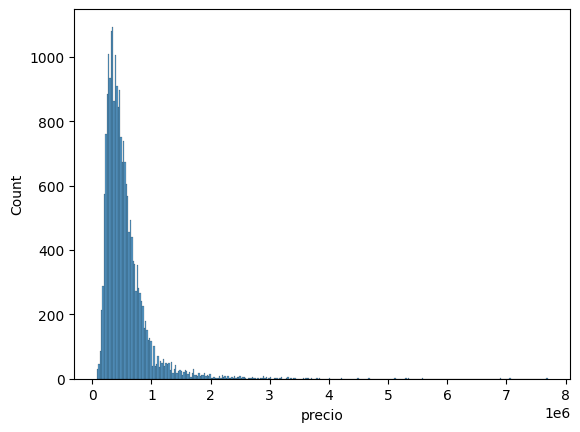

In [18]:
# comprobación de la distribución de precios
sns.histplot(df['precio'])

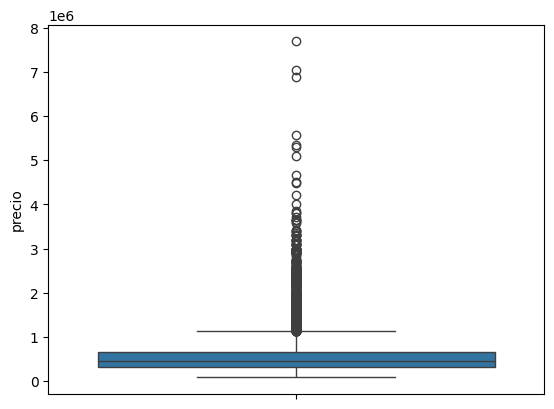

In [19]:
sns.boxplot(df['precio'])
plt.show()


Centrandome en el variable objetivo, el precio, puedo ver, que sigue una distribución normal, aunque presenta una notable asimetría hacia la derecha debido a la presencia de muchos valores atípicos elevados. Esto podría requerir una transformación adicional.

### Outliers

Ahora presentare el codigo para detectar los outliers y eliminar los outliers, aunque los utlizaremos mas adelante.

In [20]:
# Vamos a eliminar los Outliers


# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
#Q1 = df_concatenado['precio'].quantile(0.25)
#Q3 = df_concatenado['precio'].quantile(0.75)

# Calcular el rango intercuartil (IQR)
#IQR = Q3 - Q1
# Definir los límites para detectar outliers
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
#df_modelo1_sin_outliers = df_modelo1[(df_modelo1['precio'] >= lower_bound) & (df_concatenado['precio'] <= upper_bound)]

 # Imprimir el número de filas antes y después de eliminar los outliers
#print(f"Número de filas antes de eliminar outliers: {df_modelo1.shape[0]}")
#print(f"Número de filas después de eliminar outliers: {df_modelo1.shape[0]}")

### Observacions de las colummnas numéricas:

In [21]:
df_numericas

,dormitorios,baños,pies_cuadrados_vivienda,pies_cuadrados_parcela,pisos,pies_cuadrados_sin_sotano,pies_cuadrados_sótano,año_construcción,año_renovación,pies_cuadrados_salon_15,pies_cuadrados_parcela_15,precio
0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650,221900
1,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639,538000
2,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062,180000
3,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000,604000
4,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,1530,0,2009,0,1530,1509,360000
21593,4,2.50,2310,5813,2.0,2310,0,2014,0,1830,7200,400000
21594,2,0.75,1020,1350,2.0,1020,0,2009,0,1020,2007,402101
21595,3,2.50,1600,2388,2.0,1600,0,2004,0,1410,1287,400000


In [22]:
correlation_matrix=df.corr()
correlation_matrix

,dormitorios,baños,pies_cuadrados_vivienda,pies_cuadrados_parcela,pisos,frente_al_mar,vista,estado,calificación,pies_cuadrados_sin_sotano,pies_cuadrados_sótano,año_construcción,año_renovación,código_postal,pies_cuadrados_salon_15,pies_cuadrados_parcela_15,precio
dormitorios,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,0.393406,0.030690,0.308787
baños,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.569884,0.088303,0.525906
pies_cuadrados_vivienda,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.756402,0.184342,0.701917
pies_cuadrados_parcela,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,0.144763,0.718204,0.089876
pisos,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.280102,-0.010722,0.256804
frente_al_mar,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,0.086507,0.030781,0.266398
vista,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.280681,0.072904,0.397370
estado,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.093072,-0.003126,0.036056
calificación,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.713867,0.120981,0.667951
pies_cuadrados_sin_sotano,0.479386,0.686668,0.876448,0.184139,0.523989,0.072109,0.167609,-0.158904,0.756073,1.000000,-0.052156,0.424037,0.023251,-0.261570,0.731767,0.195077,0.605368


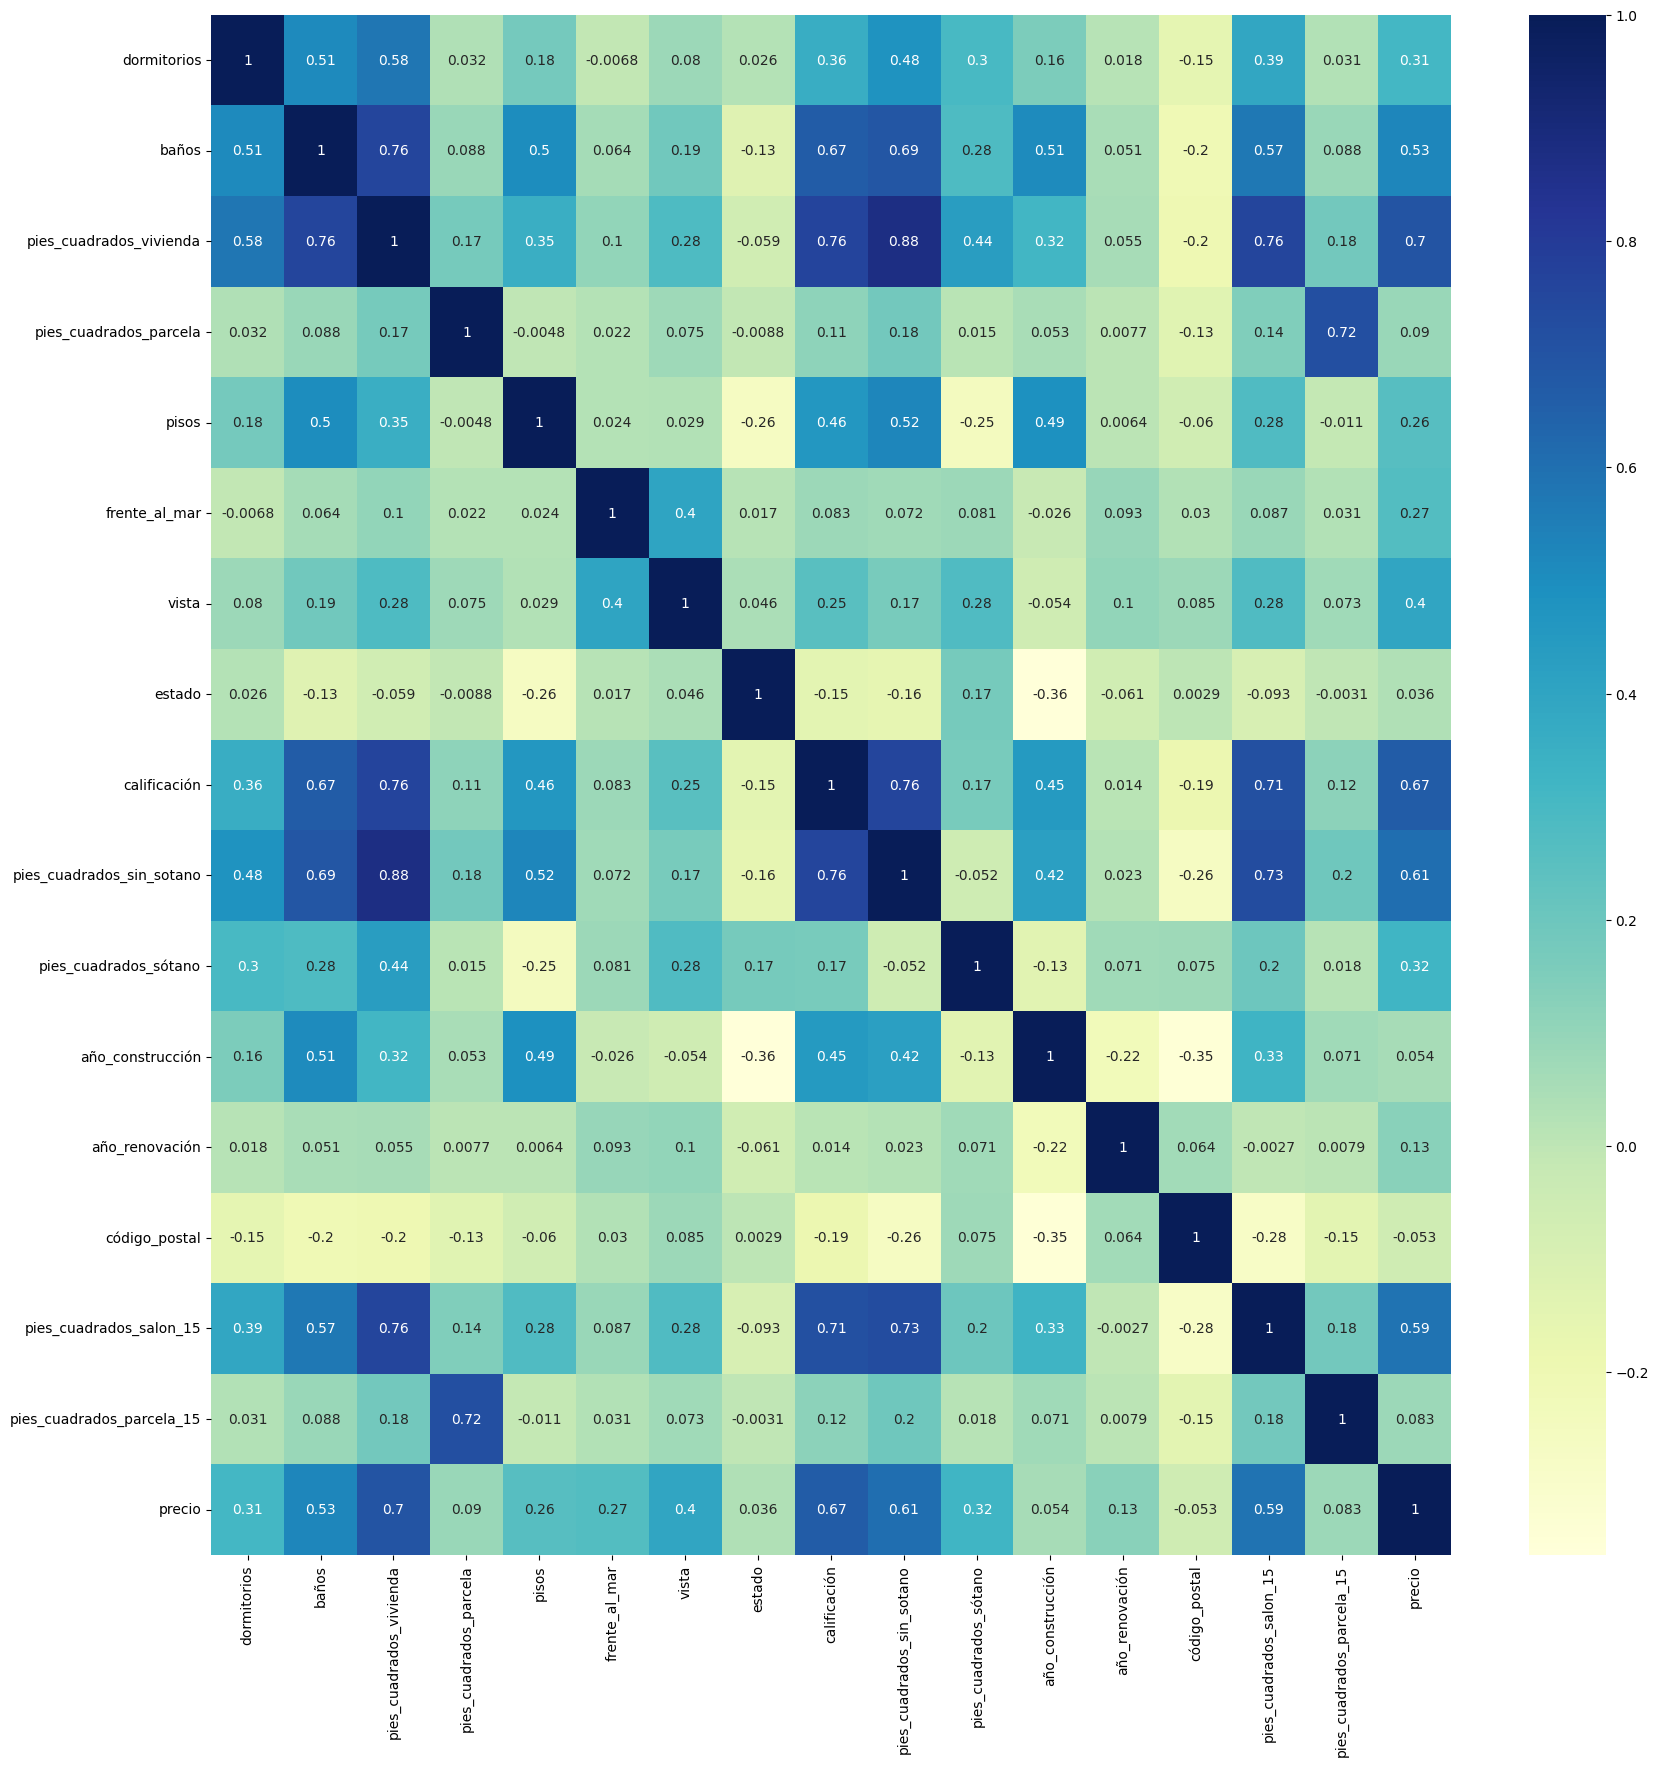

In [23]:
# Suponiendo que ya tienes corr_matrix calculada
corr_matrix = df.corr(method='pearson')

# Crear la figura con un solo subgráfico
fig, ax = plt.subplots(figsize=(20, 20))

# Crear el heatmap con la paleta de colores 'viridis'
ax = sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
# Mostrar la figura
plt.show()





In [24]:
# Voy a mirar la correlacion de las caracteristicas con el precio.
df.corr()['precio'].sort_values(ascending=False)

precio                       1.000000
pies_cuadrados_vivienda      0.701917
calificación                 0.667951
pies_cuadrados_sin_sotano    0.605368
pies_cuadrados_salon_15      0.585241
baños                        0.525906
vista                        0.397370
pies_cuadrados_sótano        0.323799
dormitorios                  0.308787
frente_al_mar                0.266398
pisos                        0.256804
año_renovación               0.126424
pies_cuadrados_parcela       0.089876
pies_cuadrados_parcela_15    0.082845
año_construcción             0.053953
estado                       0.036056
código_postal               -0.053402
Name: precio, dtype: float64

Las siguientes características tienen una correlación fuerte con el precio. Esto sugiere que el tamaño y la calidad de una casa (medidos por los metros cuadrados y la clasificacion) son factores importantes que influyen en su precio:

- pies_cuadrados_vivienda: 0.70

- clasificacion: 0,67

- pies_cuadrados_sin_sotano 0.61

- pies_cuadrados_vivienda_15: 0.59

- baños: 0.53

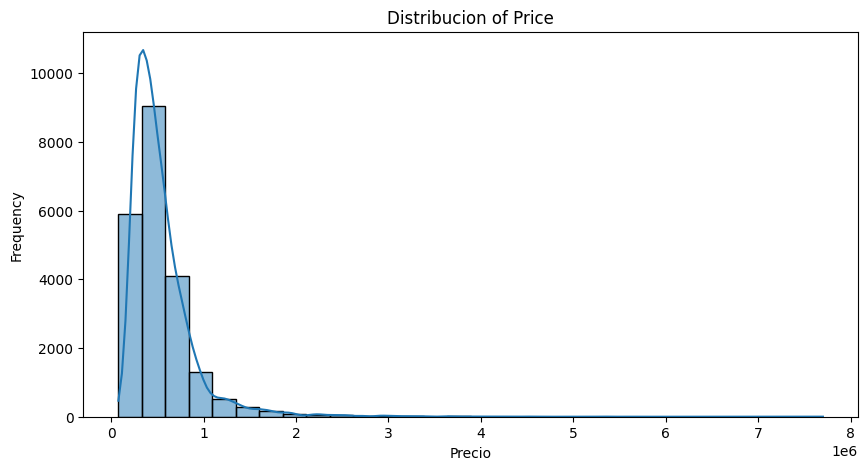

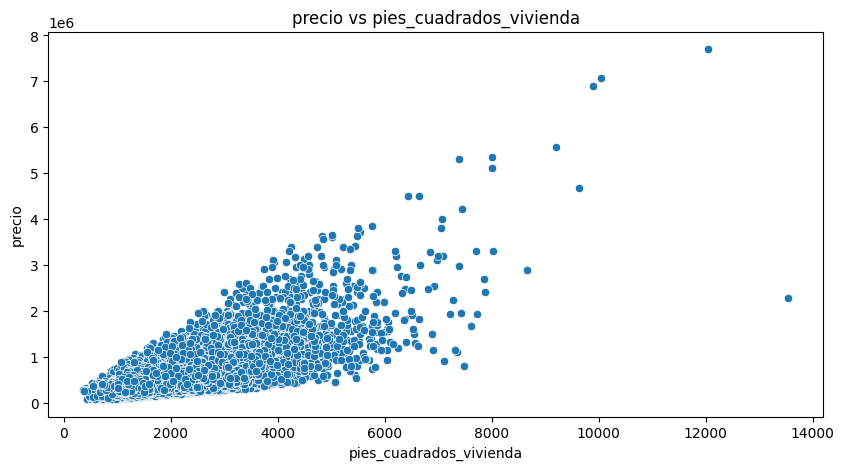

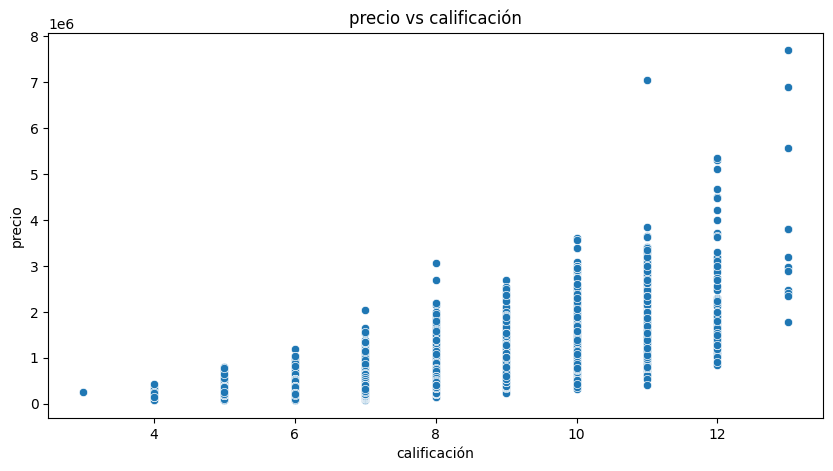

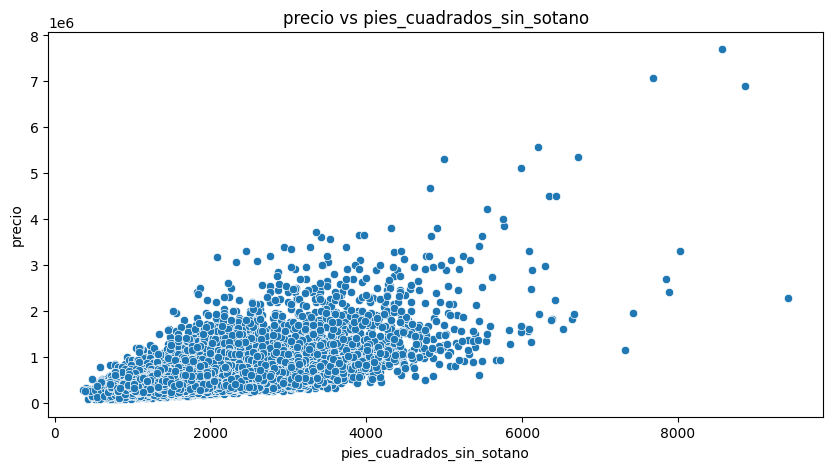

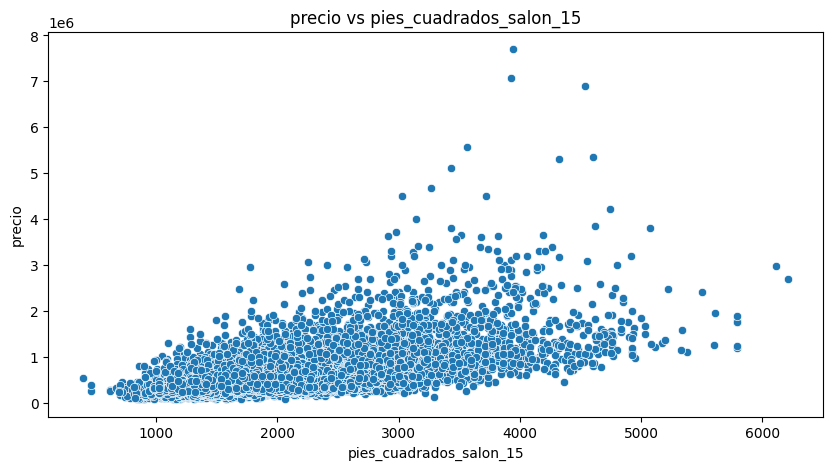

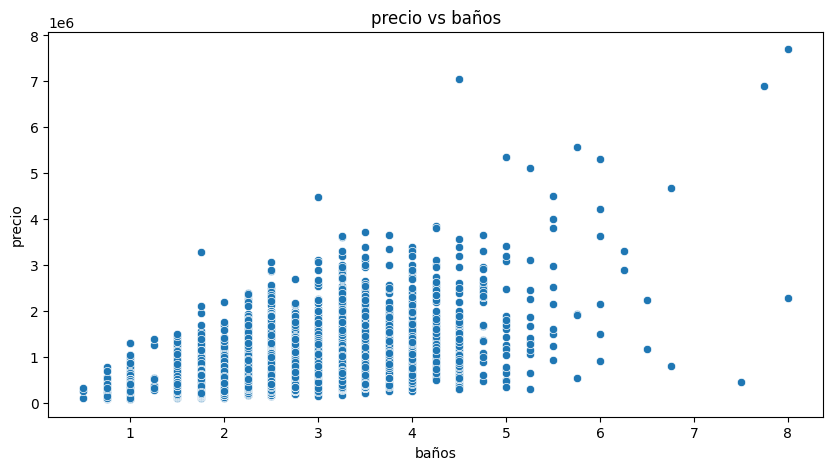

In [25]:
#  Trazar histograma para 'precio
plt.figure(figsize=(10, 5))
sns.histplot(df['precio'], bins=30, kde=True)
plt.title('Distribucion of Price')
plt.xlabel('Precio')
plt.ylabel('Frequency')
plt.show()

# Trazar gráficos de dispersión para 'precio' vs características altamente correlacionadas
highly_corr_features = ['pies_cuadrados_vivienda', 'calificación', 'pies_cuadrados_sin_sotano', 'pies_cuadrados_salon_15', 'baños']
for feature in highly_corr_features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=feature, y='precio')
    plt.title(f'precio vs {feature}')
    plt.show()

Aquí tienes un resumen de las observaciones sobre la relación entre el precio de las viviendas y sus características:

- Distribución de precios: La distribución de precios muestra una asimetría hacia la derecha, indicando que la mayoría de las casas tienen precios bajos, pero hay algunas con precios muy altos.

- Precio vs. Metros cuadrados de superficie habitable: Existe una correlación positiva entre los metros cuadrados de superficie habitable y el precio, con una relación bastante lineal. Esto es lógico, ya que las casas más grandes tienden a ser más caras.

- Precio vs. Clasificacón: La clasificación de una casa también muestra una correlación positiva con el precio. Las casas con una clasificación más altas suelen ser más caras, lo cual es esperable debido a la calidad superior.

- Precio vs. pies cuadrados sin sotano: Los metros cuadrados de la casa sin contra del sótano también tienen una correlación positiva con el precio. Los espacios habitables por encima del nivel del suelo incrementan el precio de una casa.

- Precio vs. pies cuadrados de salon en 2015: El tamaño  del salon en 2015 afecta al precio, aunque hay cierta dispersión en los datos.
Las superficies habitables más grandes en 2015 tienden a asociarse con precios más altos.

- Precio vs. Número de baños: El número de baños de una casa está correlacionado positivamente con su precio. Las casas con más baños tienden a ser más caras.

Estas observaciones iniciales indican que varios factores, como el tamaño, la categoría y el número de baños, influyen en los precios de las viviendas. Sin embargo, para una comprensión y predicción más precisa de los precios de la vivienda, sería necesario realizar un análisis multivariante o utilizar modelos de aprendizaje automático.

### Observacions de las colummnas categóricas:

In [26]:
df_categorica

,estado,frente_al_mar,vista,calificación
0,3,0,0,7
1,3,0,0,7
2,3,0,0,6
3,5,0,0,7
4,3,0,0,8
...,...,...,...,...
21592,3,0,0,8
21593,3,0,0,8
21594,3,0,0,7
21595,3,0,0,8


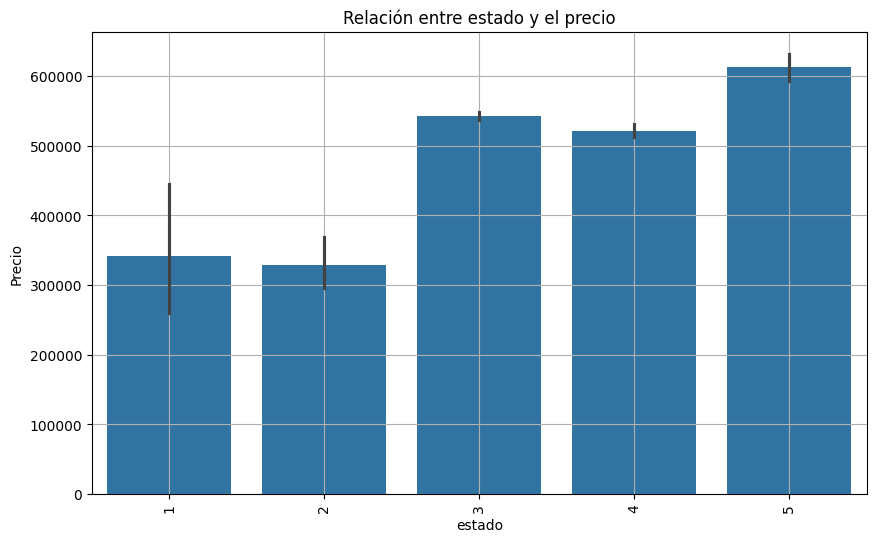

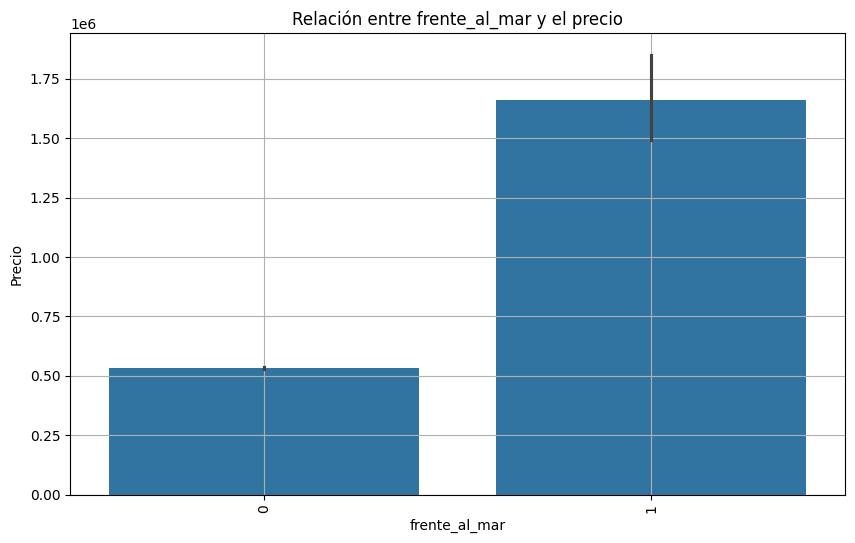

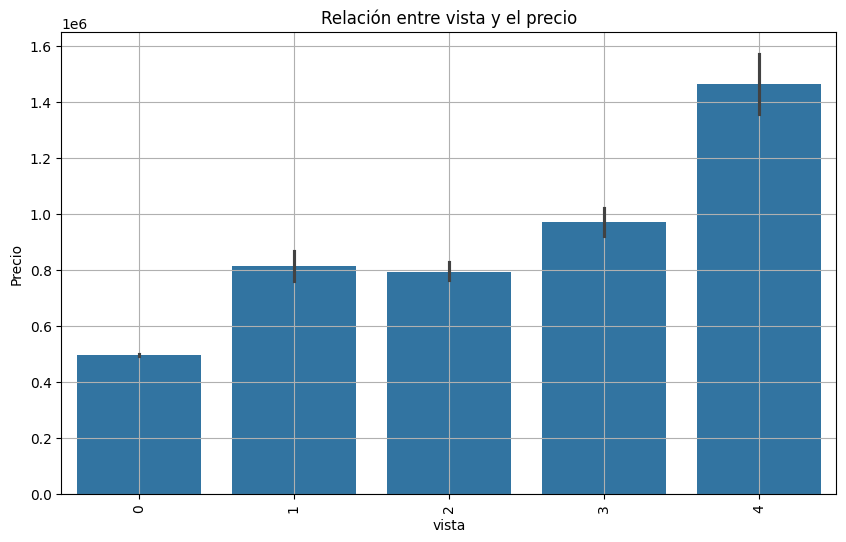

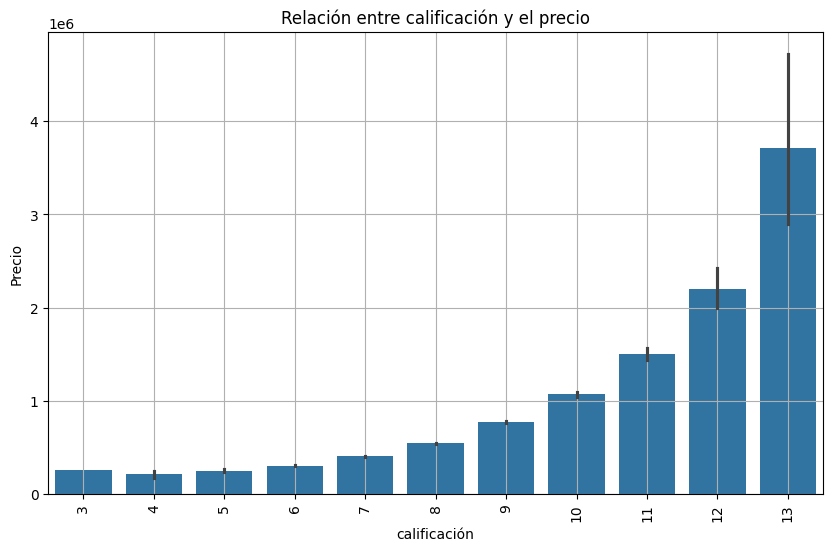

In [27]:
# Trazar gráficos de las características categóricas y el precio.

# Iterar sobre las columnas categóricas y crear gráficos de barras
for column in df_categorica.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='precio', data=df_concatenado)
    plt.title(f'Relación entre {column} y el precio')
    plt.xlabel(column)
    plt.ylabel('Precio')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


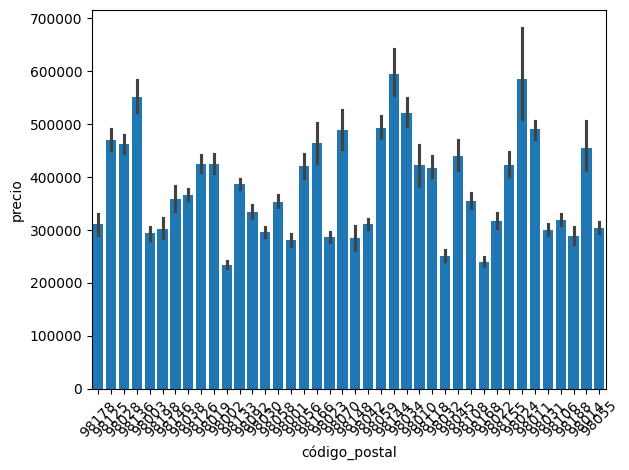

In [28]:
# checking median price per zipcodes with median price below 650K
precio_medio = df.groupby('código_postal')['precio'].median().reset_index()
# creating filter for zipcodes based on the median price and creating df for it
low_price_zipcodes = precio_medio[precio_medio['precio'] < 500000]['código_postal']
low_price_df = df[df['código_postal'].isin(low_price_zipcodes)]
# creating the bar plot for filtered df
sns.barplot(x=low_price_df['código_postal'], y=low_price_df['precio'], saturation=1, dodge=False)
plt.xticks(rotation=45)
plt.figsize=(70, 50)
plt.tight_layout()
plt.show()

Caracteristicas categóricas y el precio:

Podemos ver que por lo general, segun mejorar las carateristicas, tambien aumenta el precio.
Tambien podemos ver que hay zonas con preciaos más altos respecto a otras.

## 5. Modelización de datos y examenar el cruzado de modelos

### MODELO BASE (df_modelo1)

In [29]:
# codificación de la variable categórica (código postal)
df_modelo1 = pd.get_dummies(df, drop_first=True)
df_modelo1

,dormitorios,baños,pies_cuadrados_vivienda,pies_cuadrados_parcela,pisos,frente_al_mar,vista,estado,calificación,pies_cuadrados_sin_sotano,...,código_postal_98146,código_postal_98148,código_postal_98155,código_postal_98166,código_postal_98168,código_postal_98177,código_postal_98178,código_postal_98188,código_postal_98198,código_postal_98199
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,False,False,False,False,False,False,True,False,False,False
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,False,False,False,False,False,False,False,False,False,False
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,False,False,False,False,False,False,False,False,False,False
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,False,False,False,False,False,False,False,False,False,False
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,False,False,False,False,False,False,False,False,False,False
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,True,False,False,False,False,False,False,False,False,False
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,False,False,False,False,False,False,False,False,False,False
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,False,False,False,False,False,False,False,False,False,False


#### Modelo de regresión lineal


In [30]:
# Uso el DataFreme df_modelo1.

X = df_modelo1.drop(['precio'], axis=1)
y = df_modelo1['precio']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train


# y_pred es la lista de predicciones
# y_test es la lista de valores reales

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
predictions = lm.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.8
RMSE: 164236.79601030657
MAE: 96394.52088692758


c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: ylabel='precio'>

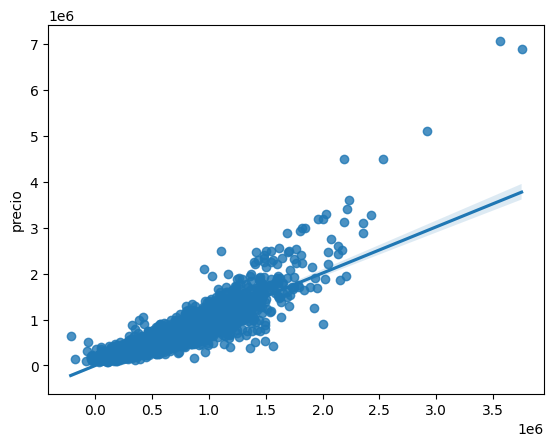

In [31]:
sns.regplot(x=predictions, y=y_test)

Interpretación General:

- R² = 0.8: Indica que el modelo explica el 80% de la variabilidad en los precios. Esto es bastante bueno y sugiere que el modelo tiene un poder predictivo decente.

- RMSE = 164,236.80: Indica que las predicciones del modelo tienen un error promedio de aproximadamente 164,237 unidades de precio. Este valor puede parecer alto dependiendo de la escala de los precios en el conjunto de datos.

- MAE = 96,394.52: Indica que las predicciones del modelo tienen un error promedio absoluto de aproximadamente 96,395 unidades de precio. Esto también puede parecer alto dependiendo de la escala de los precios.

### MODELO BASE SIN OUTLIERS:

- Mejorando el modelo, quitare Outliers

In [32]:
#Funcion para quitar los outliers en las columnas
def remove_outliers (df, columns):
    df_modelo1_sin_outliers = df_modelo1.copy()
    for col in columns:
        col_values = df_modelo1_sin_outliers[col]
        Q1 = col_values.quantile(0.25)
        Q3 = col_values.quantile(0.75)
        IQR = Q3 - Q1
        df_modelo1_sin_outliers[col] = col_values[(col_values >= Q1 - 1.5*IQR) & (col_values <= Q3 + 1.5*IQR)]
    return df_modelo1_sin_outliers.dropna()

In [33]:
df_modelo2 = remove_outliers(df_modelo1, ['dormitorios', 'baños', 'pies_cuadrados_vivienda', 'pies_cuadrados_parcela', 'pies_cuadrados_sin_sotano'])

In [34]:
df_modelo2.isnull().sum()

dormitorios                0
baños                      0
pies_cuadrados_vivienda    0
pies_cuadrados_parcela     0
pisos                      0
                          ..
código_postal_98177        0
código_postal_98178        0
código_postal_98188        0
código_postal_98198        0
código_postal_98199        0
Length: 85, dtype: int64

In [35]:
df_modelo2

,dormitorios,baños,pies_cuadrados_vivienda,pies_cuadrados_parcela,pisos,frente_al_mar,vista,estado,calificación,pies_cuadrados_sin_sotano,...,código_postal_98146,código_postal_98148,código_postal_98155,código_postal_98166,código_postal_98168,código_postal_98177,código_postal_98178,código_postal_98188,código_postal_98198,código_postal_98199
0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,...,False,False,False,False,False,False,True,False,False,False
1,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,...,False,False,False,False,False,False,False,False,False,False
3,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,...,False,False,False,False,False,False,False,False,False,False
4,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.0,2.50,1530.0,1131.0,3.0,0,0,3,8,1530.0,...,False,False,False,False,False,False,False,False,False,False
21593,4.0,2.50,2310.0,5813.0,2.0,0,0,3,8,2310.0,...,True,False,False,False,False,False,False,False,False,False
21594,2.0,0.75,1020.0,1350.0,2.0,0,0,3,7,1020.0,...,False,False,False,False,False,False,False,False,False,False
21595,3.0,2.50,1600.0,2388.0,2.0,0,0,3,8,1600.0,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# Supongamos que tienes tus datos X e y
X = df_modelo2.drop(['precio'], axis=1)
y = df_modelo2['precio']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea y ajusta el modelo
lm = LinearRegression()
lm.fit(X_train, y_train)

# Realiza las predicciones
predictions = lm.predict(X_test)

# Calcula las métricas de evaluación
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))
print("R2_score:", round(r2, 2))

RMSE: 109831.76
MAE: 73258.02
R2_score: 0.82


c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: ylabel='precio'>

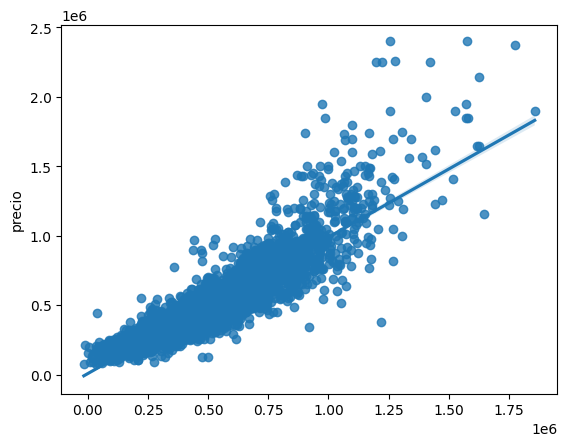

In [37]:
sns.regplot(x=predictions, y=y_test)

Evaluación Comparativa:

- R²_score: El segundo modelo tiene un R²_score más alto (0.82 frente a 0.80), lo que indica que explica mejor la variabilidad en los datos.

- RMSE: El segundo modelo tiene un RMSE más bajo (109,831.76 frente a 164,236.80), lo que sugiere que las predicciones están, en promedio, más cerca de los valores reales.

- MAE: El segundo modelo también tiene un MAE más bajo (73,258 frente a 96,394.52), lo que indica un error absoluto promedio menor entre las predicciones y los valores reales.
Conclusión

El segundo modelo es mejor en todas las métricas evaluadas (R²_score, RMSE y MAE). Por lo tanto, el segundo modelo es preferible:

R²_score: 0.82
RMSE: 109,831.76
MAE: 73,258

Estos valores indican que el segundo modelo tiene una mejor capacidad de predicción y menores errores promedio.

### MODELO LOGARITMICA
 Como he visto que el modelo basco sin outliers a mejorado respecto al modelo basico (con outliers) voy a aplicar una transformación logarítmica para seguir mejorandolo.

In [38]:
df_modelo_logaritmica1 = df_modelo2.copy()
df_modelo_logaritmica1['precio'] = df_modelo_logaritmica1['precio'].apply(np.log)

C:\Users\marco\AppData\Local\Temp\ipykernel_27400\827253687.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_modelo1['precio'])


<Axes: xlabel='precio', ylabel='Density'>

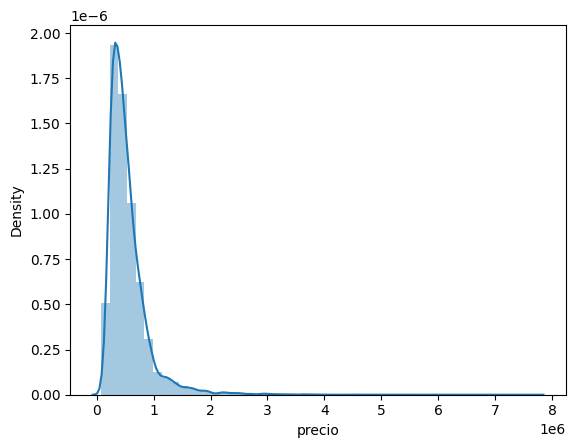

In [39]:
#before scaling: 
sns.distplot(df_modelo1['precio'])


C:\Users\marco\AppData\Local\Temp\ipykernel_27400\3987930732.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_modelo_logaritmica1['precio'])


<Axes: xlabel='precio', ylabel='Density'>

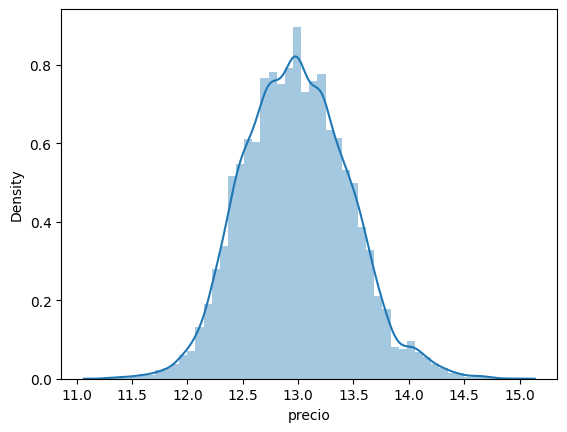

In [40]:
sns.distplot(df_modelo_logaritmica1['precio'])

In [41]:
# Aplicar transformación logarítmica a la variable dependiente

# Suponiendo que df_concatenado es tu DataFrame y está ya cargado
# Variables independientes y dependientes
X = df_modelo_logaritmica1.drop('precio', axis=1)
y = df_modelo_logaritmica1['precio']

# Aplicar transformación logarítmica a la variable dependiente
y_log = np.log(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train_log)


# Realizar predicciones
y_pred_log = modelo.predict(X_test)

# Aplicar la transformación inversa a las predicciones
y_pred = np.exp(y_pred_log)
y_test = np.exp(y_test_log)

# Evaluar el modelo

# Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r2}")

# Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae}")

# Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Raíz del Error Cuadrático Medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")

Coeficiente de Determinación (R²): 0.8661901132515291
Error Absoluto Medio (MAE): 0.12771782713863378
Error Cuadrático Medio (MSE): 0.030486912802843602
Raíz del Error Cuadrático Medio (RMSE): 0.1746050194090754


c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: ylabel='precio'>

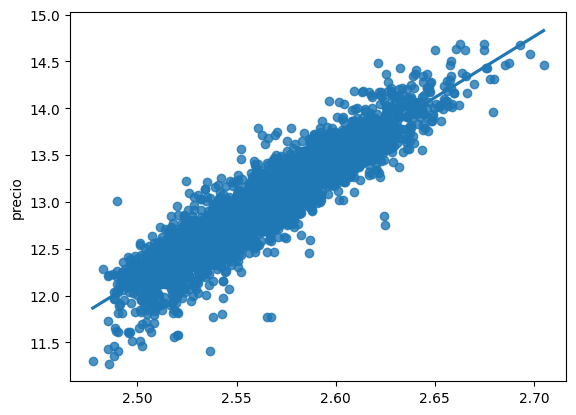

In [42]:
sns.regplot(x=y_pred_log, y=y_test)

Modelo basica sin outliers:
- RMSE: 109831.76
- MAE: 73258.02
- R2_score: 0.82

Modelo logaritmica:
- Raíz del Error Cuadrático Medio (RMSE): 0.1746050194090754
- Error Absoluto Medio (MAE): 0.12771782713863378
- Coeficiente de Determinación (R²): 0.8661901132515291

Como podemos obsercar el modelo ha mejorado notablemente en todas las métricas.

### Modelos knn, arbol de decisión ,random forest y gadient boosting:

In [43]:
# KNN
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train_log)
knn_pred_log = knn_model.predict(X_test)
knn_pred = np.exp(knn_pred_log)

# Árbol de decisión
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train_log)
dt_pred_log = dt_model.predict(X_test)
dt_pred = np.exp(dt_pred_log)

# Evaluar el modelo KNN
mae_knn = mean_absolute_error(y_test, knn_pred)
mse_knn = mean_squared_error(y_test, knn_pred)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, knn_pred)
print("KNN:")
print(f"MAE: {mae_knn}, MSE: {mse_knn}, RMSE: {rmse_knn}, R²: {r2_knn}")

# Evaluar el modelo Árbol de decisión
mae_dt = mean_absolute_error(y_test, dt_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, dt_pred)
print("Árbol de decisión:")
print(f"MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R²: {r2_dt}")


KNN:
MAE: 0.2826238624375557, MSE: 0.1276591887170557, RMSE: 0.35729426068306175, R²: 0.4396919853742094
Árbol de decisión:
MAE: 0.20497506269521357, MSE: 0.08243161458952666, RMSE: 0.2871090639278507, R²: 0.6382000012907392


In [44]:
# Bosque aleatorio :

# Combine múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste.

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_log)
rf_pred_log = rf_model.predict(X_test)
rf_pred = np.exp(rf_pred_log)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train_log)
gb_pred_log = gb_model.predict(X_test)
gb_pred = np.exp(gb_pred_log)

# Evaluar el modelo Random Forest
mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_pred)
print("Random Forest:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

# Evaluar el modelo Gradient Boosting
mae_gb = mean_absolute_error(y_test, gb_pred)
mse_gb = mean_squared_error(y_test, gb_pred)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, gb_pred)
print("Gradient Boosting:")
print(f"MAE: {mae_gb}, MSE: {mse_gb}, RMSE: {rmse_gb}, R²: {r2_gb}")



Random Forest:
MAE: 0.1524037436952427, MSE: 0.044517901238332123, RMSE: 0.2109926568350949, R²: 0.8046068041882807
Gradient Boosting:
MAE: 0.17653046409419948, MSE: 0.05329214143386164, RMSE: 0.23085090737066996, R²: 0.766095850505946


He utlizado otros modelos como KNN,arbol de decisión, Random Forest y Gradient Boosting, pero sus resultado han sido peores al de el modelo logaritmico.

### MODELOS >650K
Ahora mirare las caracteristicas de las casas con un precio superior ha 650.000

In [45]:

df_650k = df[df['precio'] >= 650000]
df_650k

,dormitorios,baños,pies_cuadrados_vivienda,pies_cuadrados_parcela,pisos,frente_al_mar,vista,estado,calificación,pies_cuadrados_sin_sotano,pies_cuadrados_sótano,año_construcción,año_renovación,código_postal,pies_cuadrados_salon_15,pies_cuadrados_parcela_15,precio
5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,4760,101930,1230000
10,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,2210,8925,662500
15,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,2140,4000,650000
21,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,4110,20336,2000000
26,3,1.75,2450,2691,2.0,0,0,3,8,1750,700,1915,0,98119,1760,3573,937000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,5,2.75,3600,9437,2.0,0,0,3,9,3600,0,2014,0,98059,3550,9421,679950
21581,4,3.25,3410,10125,2.0,0,0,3,10,3410,0,2007,0,98040,2290,10125,1580000
21583,4,3.00,3990,7838,2.0,0,0,3,9,3990,0,2003,0,98053,3370,6814,810000
21584,5,3.75,4470,8088,2.0,0,0,3,11,4470,0,2008,0,98004,2780,8964,1540000


<Axes: xlabel='precio', ylabel='Count'>

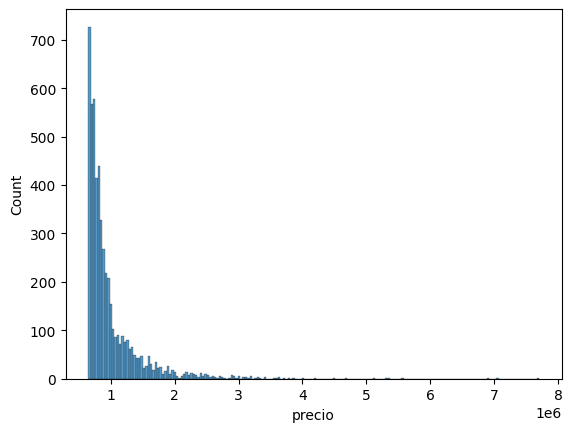

In [46]:
sns.histplot(df_650k['precio'])

In [47]:
correlation_matrix1=df_650k.corr()
correlation_matrix1

,dormitorios,baños,pies_cuadrados_vivienda,pies_cuadrados_parcela,pisos,frente_al_mar,vista,estado,calificación,pies_cuadrados_sin_sotano,pies_cuadrados_sótano,año_construcción,año_renovación,código_postal,pies_cuadrados_salon_15,pies_cuadrados_parcela_15,precio
dormitorios,1.000000,0.438699,0.451620,-0.012672,0.151699,-0.057167,-0.021190,-0.022393,0.203083,0.349018,0.210574,0.088660,-0.016263,-0.122615,0.223356,-0.003299,0.202216
baños,0.438699,1.000000,0.742041,0.107068,0.360818,0.050336,0.120344,-0.193247,0.582764,0.636169,0.238241,0.416487,0.044663,-0.148711,0.400616,0.131606,0.465078
pies_cuadrados_vivienda,0.451620,0.742041,1.000000,0.174185,0.301894,0.077987,0.180542,-0.180627,0.705649,0.838730,0.353006,0.376745,-0.013885,-0.203566,0.606598,0.215391,0.606855
pies_cuadrados_parcela,-0.012672,0.107068,0.174185,1.000000,0.017225,0.007756,0.017458,-0.055730,0.133832,0.200768,-0.032450,0.117602,-0.032947,-0.136235,0.080871,0.732491,0.032130
pisos,0.151699,0.360818,0.301894,0.017225,1.000000,0.001175,-0.074811,-0.289484,0.391484,0.516762,-0.346260,0.348226,-0.007782,0.003233,0.157883,0.032326,0.126413
frente_al_mar,-0.057167,0.050336,0.077987,0.007756,0.001175,1.000000,0.427265,0.003508,0.044342,0.027146,0.093273,-0.029065,0.098315,0.069883,0.050985,0.013342,0.311090
vista,-0.021190,0.120344,0.180542,0.017458,-0.074811,0.427265,1.000000,0.054386,0.133000,0.003956,0.317110,-0.087466,0.115099,0.165572,0.172126,0.011747,0.339441
estado,-0.022393,-0.193247,-0.180627,-0.055730,-0.289484,0.003508,0.054386,1.000000,-0.288877,-0.312192,0.212338,-0.479161,-0.106346,0.101662,-0.166996,-0.068842,0.004123
calificación,0.203083,0.582764,0.705649,0.133832,0.391484,0.044342,0.133000,-0.288877,1.000000,0.725696,0.019127,0.500988,-0.065417,-0.221581,0.620037,0.176107,0.507928
pies_cuadrados_sin_sotano,0.349018,0.636169,0.838730,0.200768,0.516762,0.027146,0.003956,-0.312192,0.725696,1.000000,-0.213412,0.503845,-0.070808,-0.271726,0.599683,0.242895,0.466493


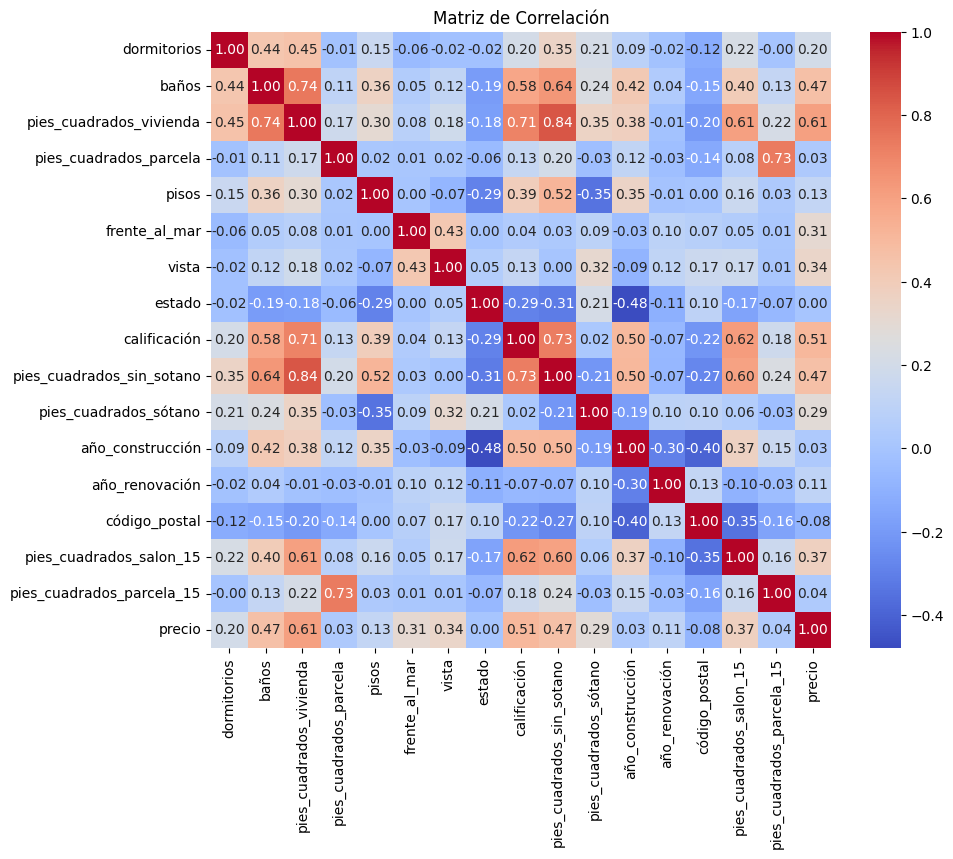

In [48]:
plt.figure(figsize=(10, 8))  # Define el tamaño de la figura
sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()



pies_cuadrados_vivienda: 0.61

clasificacion: 0,51

pies_cuadrados_sin_sotano 0.47

baños: 0.47



In [49]:
df_650k_final = pd.get_dummies(df, drop_first=True)
df_650k_final

,dormitorios,baños,pies_cuadrados_vivienda,pies_cuadrados_parcela,pisos,frente_al_mar,vista,estado,calificación,pies_cuadrados_sin_sotano,...,código_postal_98146,código_postal_98148,código_postal_98155,código_postal_98166,código_postal_98168,código_postal_98177,código_postal_98178,código_postal_98188,código_postal_98198,código_postal_98199
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,False,False,False,False,False,False,True,False,False,False
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,False,False,False,False,False,False,False,False,False,False
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,False,False,False,False,False,False,False,False,False,False
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,False,False,False,False,False,False,False,False,False,False
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,False,False,False,False,False,False,False,False,False,False
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,True,False,False,False,False,False,False,False,False,False
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,False,False,False,False,False,False,False,False,False,False
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,False,False,False,False,False,False,False,False,False,False


#### MODELO DE REGRESION LINEAL:

In [50]:
# Supongamos que tienes tus datos X e y
X = df_650k_final.drop(['precio'], axis=1)
y = df_650k_final['precio']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea y ajusta el modelo
lm = LinearRegression()
lm.fit(X_train, y_train)

# Realiza las predicciones
predictions = lm.predict(X_test)

# Calcula las métricas de evaluación
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))
print("R2_score:", round(r2, 2))
intercepto = modelo.intercept_

RMSE: 164236.8
MAE: 96394.52
R2_score: 0.8


c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: ylabel='precio'>

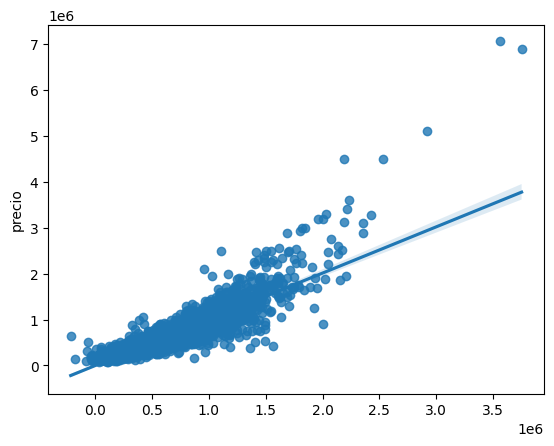

In [51]:
sns.regplot(x=predictions, y=y_test)

In [52]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df_650k_final['precio'].quantile(0.25)
Q3 = df_650k_final['precio'].quantile(0.75)

# Calcular el rango intercuartil (IQR)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
df_650k_final_sin_outliers = df_650k_final[(df_650k_final['precio'] >= lower_bound) & (df_concatenado['precio'] <= upper_bound)]

# Imprimir el número de filas antes y después de eliminar los outliers
print(f"Número de filas antes de eliminar outliers: {df_650k_final.shape[0]}")
print(f"Número de filas después de eliminar outliers: {df_650k_final_sin_outliers.shape[0]}")

Número de filas antes de eliminar outliers: 21597
Número de filas después de eliminar outliers: 20439


#### MODELO DE REGRESION LINEAL SIN OUTLIERS:

In [53]:
# Supongamos que tienes tus datos X e y
X = df_650k_final_sin_outliers.drop(['precio'], axis=1)
y = df_650k_final_sin_outliers['precio']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea y ajusta el modelo
lm = LinearRegression()
lm.fit(X_train, y_train)

# Realiza las predicciones
predictions = lm.predict(X_test)

# Calcula las métricas de evaluación
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))
print("R2_score:", round(r2, 2))

RMSE: 83472.93
MAE: 61972.98
R2_score: 0.84


c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: ylabel='precio'>

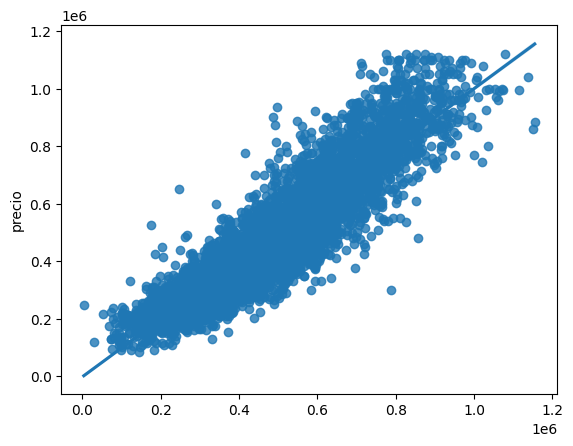

In [54]:
sns.regplot(x=predictions, y=y_test)

df_650k_final (Con outliers)

RMSE: 164236.8
MAE: 96394.52
R2_score: 0.8

df_650k_final_sin_outliers
RMSE: 83472.93
MAE: 61972.98
R2_score: 0.84

Podemos ver que el modelo sin outliers tiene menos error de predicción y mejor ajuste, indicando un modelo más preciso y confiable.

#### MODELO LOGARITMICO:

In [55]:
# Suponiendo que df_concatenado es tu DataFrame y está ya cargado
# Variables independientes y dependientes
X = df_650k_final_sin_outliers.drop('precio', axis=1)
y = df_650k_final_sin_outliers['precio']

# Aplicar transformación logarítmica a la variable dependiente
y_log = np.log(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.1, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train_log)

# Obtener la matriz de coeficientes
coeficientes = modelo.coef_
intercepto = modelo.intercept_


# Realizar predicciones
y_pred_log = modelo.predict(X_test)

# Aplicar la transformación inversa a las predicciones
y_pred = np.exp(y_pred_log)
y_test = np.exp(y_test_log)

# Evaluar el modelo

# Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (MAE): {mae}")

# Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Raíz del Error Cuadrático Medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")

# Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r2}")

# Error Absoluto Porcentual Medio (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Error Absoluto Porcentual Medio (MAPE): {mape}")

# Error Absoluto Mediano (MedAE)
medae = median_absolute_error(y_test, y_pred)
print(f"Error Absoluto Mediano (MedAE): {medae}")

Error Absoluto Medio (MAE): 60461.24692876901
Error Cuadrático Medio (MSE): 7733061363.479565
Raíz del Error Cuadrático Medio (RMSE): 87937.82669295145
Coeficiente de Determinación (R²): 0.8147197651478528
Error Absoluto Porcentual Medio (MAPE): 13.38489187913741
Error Absoluto Mediano (MedAE): 40029.718872152705


c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: ylabel='precio'>

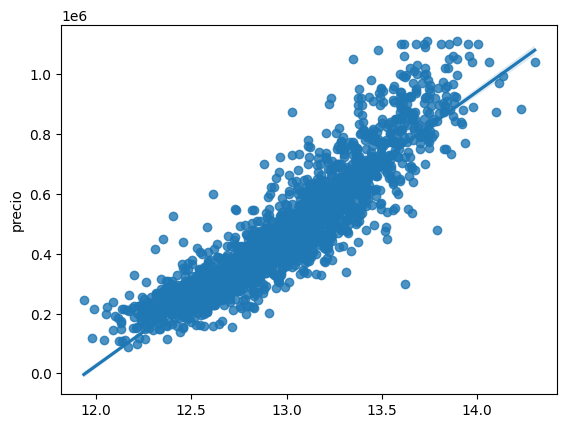

In [56]:
sns.regplot(x=y_pred_log, y=y_test)

Modelo logarítmico:

Raíz del Error Cuadrático Medio (RMSE): 87937.82669295145
Error Absoluto Medio (MAE): 60461.24692876901
Coeficiente de Determinación (R²): 0.8147197651478528


df_650k_final_sin_outliers
RMSE: 83472.93
MAE: 61972.98
R2_score: 0.

Análisis
RMSE (Raíz del Error Cuadrático Medio):

df_650k_final_sin_outliers tiene un RMSE más bajo (83,472.93 vs. 87,937.83), lo que indica menor error en las predicciones.
MAE (Error Absoluto Medio):

Modelo Logarítmico tiene un MAE más bajo (60,461.25 vs. 61,972.98), sugiriendo menor error promedio en las predicciones.
R² (Coeficiente de Determinación):

df_650k_final_sin_outliers tiene un R² ligeramente más alto (0.84 vs. 0.8147), lo que indica que explica mejor la variabilidad de los datos.
Conclusión
Aunque el modelo logarítmico tiene un MAE ligeramente mejor, el modelo df_650k_final_sin_outliers tiene un RMSE más bajo y un R² ligeramente superior. En general, el modelo df_650k_final_sin_outliers parece ser el mejor modelo debido a su mejor ajuste general y menor error de predicción.


#### MODELOS KNN, ARBOL DE DECISON, RADON FOREST, GRADIENT FOREST:

In [57]:
# KNN
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train_log)
knn_pred_log = knn_model.predict(X_test)
knn_pred = np.exp(knn_pred_log)

# Árbol de decisión
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train_log)
dt_pred_log = dt_model.predict(X_test)
dt_pred = np.exp(dt_pred_log)

# Evaluar el modelo KNN
mae_knn = mean_absolute_error(y_test, knn_pred)
mse_knn = mean_squared_error(y_test, knn_pred)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, knn_pred)
print("KNN:")
print(f"MAE: {mae_knn}, MSE: {mse_knn}, RMSE: {rmse_knn}, R²: {r2_knn}")

# Evaluar el modelo Árbol de decisión
mae_dt = mean_absolute_error(y_test, dt_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, dt_pred)
print("Árbol de decisión:")
print(f"MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R²: {r2_dt}")

KNN:
MAE: 123788.31004735095, MSE: 25339780492.766396, RMSE: 159184.7369968817, R²: 0.39287168947420914
Árbol de decisión:
MAE: 90742.61001139398, MSE: 17138348120.982962, RMSE: 130913.51389746959, R²: 0.5893738565389091


In [58]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_log)
rf_pred_log = rf_model.predict(X_test)
rf_pred = np.exp(rf_pred_log)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train_log)
gb_pred_log = gb_model.predict(X_test)
gb_pred = np.exp(gb_pred_log)

# Evaluar el modelo Random Forest
mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, rf_pred)
print("Random Forest:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

# Evaluar el modelo Gradient Boosting
mae_gb = mean_absolute_error(y_test, gb_pred)
mse_gb = mean_squared_error(y_test, gb_pred)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, gb_pred)
print("Gradient Boosting:")
print(f"MAE: {mae_gb}, MSE: {mse_gb}, RMSE: {rmse_gb}, R²: {r2_gb}")

Random Forest:
MAE: 63873.348609760775, MSE: 8577199563.442849, RMSE: 92613.17165200018, R²: 0.7944946412822261
Gradient Boosting:
MAE: 77002.30184169863, MSE: 10846588945.713747, RMSE: 104146.95840836519, R²: 0.7401212207241192


Conclusión
El modelo df_650k_final_sin_outliers es el mejor modelo en general debido a su menor RMSE y el R² más alto, indicando un mejor ajuste y menor error de predicción en comparación con los otros modelos. Sin embargo, el modelo logarítmico también es competitivo con un MAE más bajo. Los modelos Random Forest y Gradient Boosting, KNN y arbol de decision tienen un desempeño inferior en este caso.


## 6. CONCLUSIONES:


Después de realizar el análisis, se observó que las características relacionadas con el tamaño de la vivienda, como los pies cuadrados totales, la superficie habitable sin contar el sótano y la superficie del salón principal, tienen una correlación significativa con el precio de la vivienda. Este hallazgo sugiere que, en general, las viviendas más grandes tienden a ser más costosas. Además, características como el número de baños y una clasificación superior también influyen notablemente en el precio de la vivienda.

El modelo logarítmico es el mejor en términos generales, al demostrar un menor RMSE y MAE, así como un R² más alto. Estos indicadores sugieren un mejor ajuste del modelo y una menor variabilidad en las predicciones.

En cuanto al modelo basado en precios superiores a 650.000 dólares, se encontró que el modelo sin outliers, sin la transformación logarítmica, mostró un rendimiento superior. Este modelo exhibió un RMSE y MAE menores, así como un R² más alto en comparación con otros modelos probados, lo que lo posiciona como la mejor opción dentro de los modelos analizados.
